In [1]:
import warnings
warnings.filterwarnings("ignore") 

import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats

from helper import read_and_average_virtual_exp

### Reading mouse & human insertion data

In [2]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD"
mouse_data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_singletons"
human_data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_singletons_humanpred"

# reading mouse data, averaging over targets and backgrounds
df_mouse = read_and_average_virtual_exp(mouse_data_dir, stat_to_average=stat_of_analysis_interest)

# reading human data, averaging over targets and backgrounds
df_human = read_and_average_virtual_exp(human_data_dir, stat_to_average=stat_of_analysis_interest, head_index=0)

reading h5 files to dataframes
averaging over targets
averaging over backgrounds
collecting data for SCD
reading h5 files to dataframes
averaging over targets
averaging over backgrounds
collecting data for SCD


### Scatterplot & correlation between mouse & human scores

Text(0.71, 0.05, 'Pearson R = 0.9984')

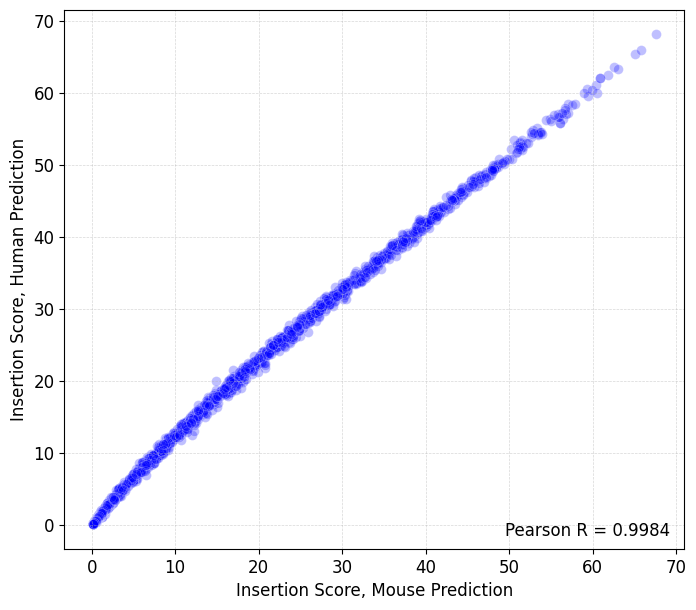

In [3]:
plt.figure(figsize=(8, 7))
plt.scatter(x=df_mouse[f"{stat_of_analysis_interest}"], y=df_human[f"{stat_of_analysis_interest}"], alpha=0.25, edgecolors='w', linewidth=0.5, color='blue', s=50)
m_h_corr = round(stats.pearsonr(df_mouse[f"{stat_of_analysis_interest}"], df_human[f"{stat_of_analysis_interest}"]).statistic, 4)

plt.xlabel("Insertion Score, Mouse Prediction")
plt.ylabel("Insertion Score, Human Prediction")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.text(x=0.71, y=0.05, s=f"Pearson R = {m_h_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# plt.savefig("./plots/insertion_score_mouse_human.pdf", format="pdf", bbox_inches="tight")